In [5]:
import json
import matplotlib.pyplot as plt
from collections import Counter

def plot_correct_attempts_by_level(file_path):
    with open(file_path, 'r') as file:
        data = [json.loads(line) for line in file]

    level_counts = Counter()
    no_correct_count = 0
    total_plays = len(data)
    wins = 0
    for entry in data:
        correct_levels = sum(1 for correct in entry['levels'].values() if correct)
        if correct_levels == 0:
            no_correct_count += 1
        else:
            for level, correct in entry['levels'].items():
                if correct:
                    level_counts[int(level)] += 1
        if all(entry['levels'].values()):
            wins += 1
    print(wins)
    print(total_plays)
    win_rate = (wins / total_plays) * 100

    levels = [-1] + sorted(level_counts.keys())
    counts = [no_correct_count] + [level_counts[level] for level in levels[1:]]

    plt.figure(figsize=(12, 6))
    plt.bar(levels, counts)

    plt.bar(max(levels) + 1, wins, color='green')

    plt.title(f'Number of Correct Guesses by Category Level (Total Plays: {total_plays}, Win Rate: {win_rate:.2f}%)')
    plt.xlabel('Category Levels and Overall Wins')
    plt.ylabel('Number of Correct Guesses')

    plt.xticks(levels + [max(levels) + 1], ['0'] + [str(level+1) for level in levels[1:]] + ['Wins'])

    for i, count in enumerate(counts):
        plt.text(levels[i], count, str(count), ha='center', va='bottom')

    plt.text(max(levels) + 1, wins, str(wins), ha='center', va='bottom')

    plt.show()


187
468


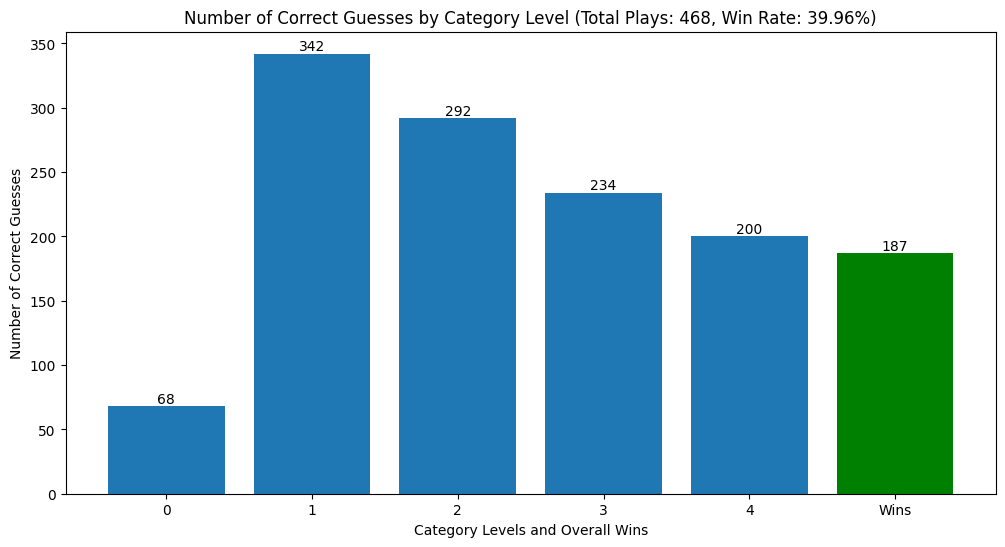

In [6]:
plot_correct_attempts_by_level('results/claude-3-5-sonnet-20240620_208fbecbef6da08c1c9a0e07aba1411669bdb497562d5012c101d55afac018bb.jsonl')

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
import json
from datetime import datetime, timedelta

def plot_win_rate_by_date(file_path):
    with open(file_path, 'r') as file:
        data = [json.loads(line) for line in file]

    date_wins = defaultdict(int)
    date_total = defaultdict(int)

    for entry in data:
        game_date = datetime.strptime(entry['game_date'], '%Y-%m-%d')
        date_total[game_date] += 1
        if all(entry['levels'].values()):
            date_wins[game_date] += 1

    def get_period_start(date):
        return date - timedelta(days=date.toordinal() % 5)

    period_wins = defaultdict(int)
    period_total = defaultdict(int)
    for date in date_total.keys():
        period_start = get_period_start(date)
        period_wins[period_start] += date_wins[date]
        period_total[period_start] += date_total[date]

    periods = sorted(period_total.keys())
    win_rates = [period_wins[period] / period_total[period] * 100 for period in periods]

    cumulative_wins = 0
    cumulative_total = 0
    cumulative_win_rates = []
    for period in periods:
        cumulative_wins += period_wins[period]
        cumulative_total += period_total[period]
        cumulative_win_rates.append(cumulative_wins / cumulative_total * 100)

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.bar(periods, win_rates, width=10, label='Period Win Rate')

    ax2 = ax1.twinx()
    ax2.plot(periods, cumulative_win_rates, color='red', linewidth=2, label='Cumulative Win Rate')

    ax1.set_title('Win Rate Over Time (5-day periods)')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Period Win Rate (%)')
    ax2.set_ylabel('Cumulative Win Rate (%)')

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
    fig.autofmt_xdate()

    ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

    ax1.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0)

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    plt.tight_layout()

    plt.show()


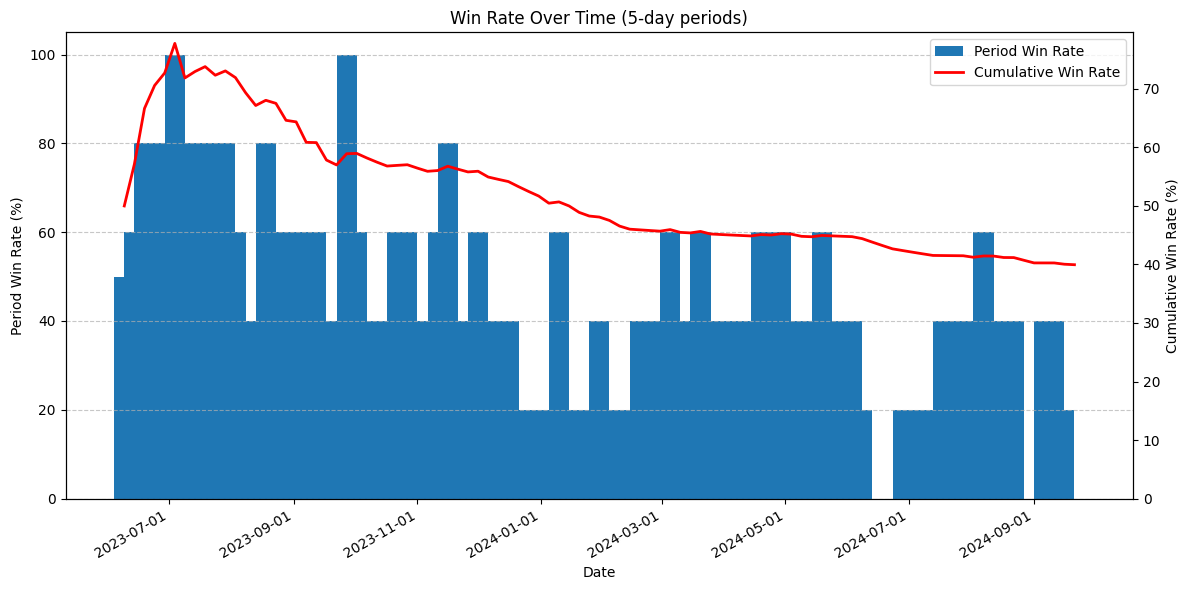

In [30]:
plot_win_rate_by_date('results/claude-3-5-sonnet-20240620_208fbecbef6da08c1c9a0e07aba1411669bdb497562d5012c101d55afac018bb.jsonl')

In [28]:
def plot_correct_categories_distribution(filename):
    with open(filename, 'r') as f:
        data = [json.loads(line) for line in f]

    correct_counts = [sum(game['levels'].values()) for game in data]

    counts = [correct_counts.count(i) for i in range(5)]

    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(range(5), counts, align='center', alpha=0.8)

    ax.set_xlabel('Number of Correct Categories')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of Correct Categories per Puzzle')
    ax.set_xticks(range(5))
    ax.set_xticklabels(['0', '1', '2', '3', '4'])

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


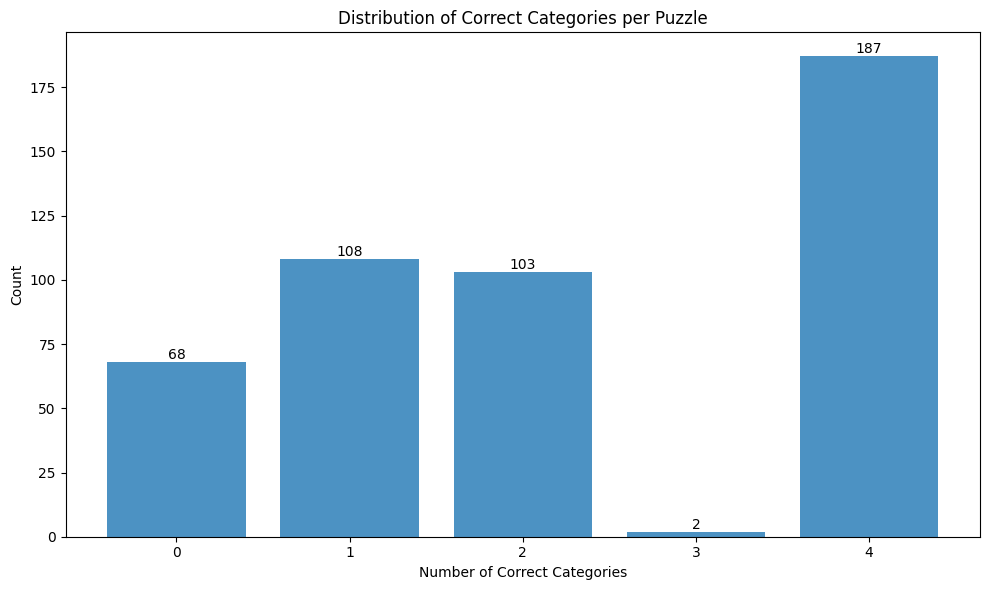

In [27]:
plot_correct_categories_distribution('results/claude-3-5-sonnet-20240620_208fbecbef6da08c1c9a0e07aba1411669bdb497562d5012c101d55afac018bb.jsonl')